# 1. KISIM

## 1.1 Gerekli Kütüphanelerin Yüklenmesi

In [2]:
# tensorflow, opencv ve matplot kütüphanelerini indiriyoruz
!pip install tensorflow opencv-python matplotlib

In [8]:
# Dosya işlemleri, veri işlemleri, resim işlemleri
# ve matplot işlemleri için gerekli kütüphaneleri
# projemize yüklüyoruz

import tensorflow as tf
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

## 1.2 Kabul Edilmeyen Formatların Silinmesi

In [11]:
# verilen resmin formatı okunabiliyor ise döndürür,
# format okunamıyor ise IOError hatası verir
# ve None döndürür

def get_image_format(image_path):
    try:
        with Image.open(image_path) as img:
            return img.format.lower()
    except IOError:
        return None

In [13]:
data_dir = 'dataset'
image_exts = ['jpg', 'jpeg'] # sadece jpg ve jpeg formatları kabul edilir

for image_class in os.listdir(data_dir):
    try:
        for image in os.listdir(os.path.join(data_dir, image_class)):
            print(image)
    except:
        print("hata")

hata
colonn624.jpeg
colonn274.jpeg
colonn761.jpeg
colonn331.jpeg
colonn3.jpeg
colonn448.jpeg
colonn18.jpeg
colonn223.jpeg
colonn673.jpeg
colonn389.jpeg
colonn366.jpeg
colonn736.jpeg
colonn809.jpeg
colonn665.jpeg
colonn235.jpeg
colonn720.jpeg
colonn370.jpeg
colonn409.jpeg
colonn59.jpeg
colonn262.jpeg
colonn798.jpeg
colonn632.jpeg
colonn327.jpeg
colonn777.jpeg
colonn848.jpeg
colonn22.jpeg
colonn219.jpeg
colonn649.jpeg
colonn999.jpeg
colonn833.jpeg
colonn560.jpeg
colonn130.jpeg
colonn425.jpeg
colonn976.jpeg
colonn75.jpeg
colonn167.jpeg
colonn537.jpeg
colonn864.jpeg
colonn921.jpeg
colonn472.jpeg
colonn188.jpeg
colonn63.jpeg
colonn258.jpeg
colonn608.jpeg
colonn872.jpeg
colonn521.jpeg
colonn171.jpeg
colonn464.jpeg
colonn937.jpeg
colonn34.jpeg
colonn126.jpeg
colonn576.jpeg
colonn825.jpeg
colonn960.jpeg
colonn599.jpeg
colonn433.jpeg
colonn444.jpeg
colonn917.jpeg
colonn852.jpeg
colonn501.jpeg
colonn151.jpeg
colonn43.jpeg
colonn278.jpeg
colonn782.jpeg
colonn628.jpeg
colonn297.jpeg
colonn940.jpeg

In [15]:
# dataset klasorünün içindeki colon_aca ve colon_n
# klasörlerindeki resimlerin hepsini dolaşır ve
# belirtilen formata uygun olmayan formattaki
# resimleri siler

for image_class in os.listdir(data_dir):
    try: 
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            
            try:
                img = cv2.imread(image_path)
                tip = get_image_format(image_path)
                if tip not in image_exts:
                    print(f'Resimin formatı uygun değil: {image_path}')
                    os.remove(image_path)
            except Exception as e:
                print(f'Format okunamıyor veya resim hatalı: {image_path}')
    except:
        print("Not a directiory")

Not a directiory


# 2.KISIM

## 2.1 Verileri Almak

In [19]:
# verileri 224x224 boyutlarında dataset klasöründen çekiyoruz

data = tf.keras.utils.image_dataset_from_directory(
    'dataset', 
    batch_size = 32, 
    image_size = (224, 224), 
    shuffle = True, 
    seed = 123
)

data = data.shuffle(1000, seed = 12)

Found 2000 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 224, 224, 3)

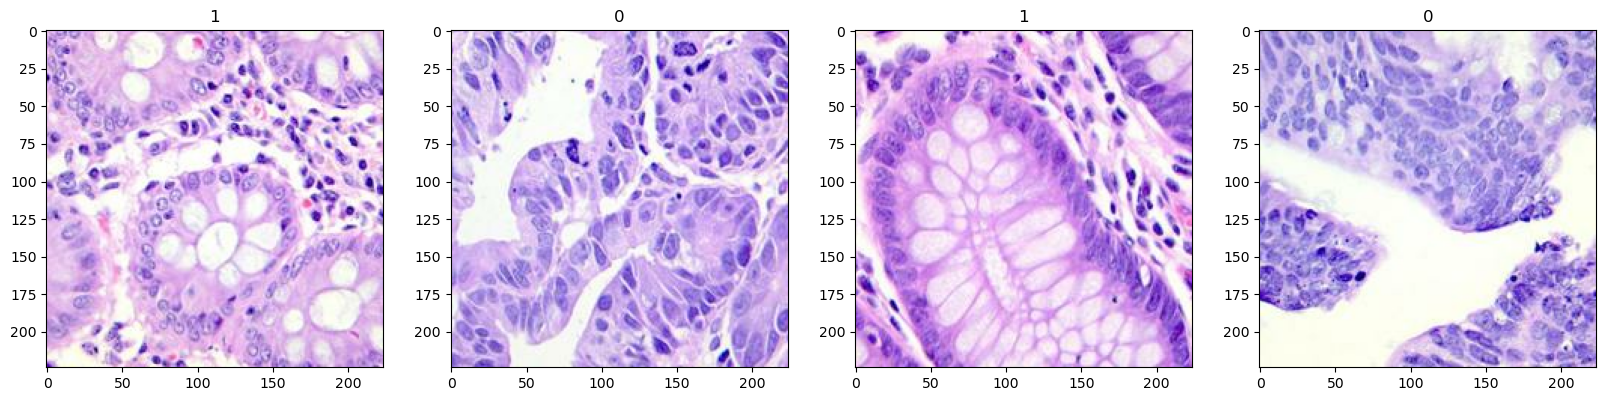

In [23]:
# sınıflandırma işlemini gösteriyoruz
# CLASS 0 - COLON_ACA
# CLASS 1 - COLON_N

fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Veriler İçin Önişleme

In [26]:
# Amaç tüm verilerin rgb değerlerini 0 ile 255 aralığından 0 ile 1 aralğına dönüştürmek
# Böylece öğrenme işleminin daha kolay ve hızlı şekilde yapılmasını hedefliyoruz
# map fonksiyonu ile tüm değelere erişiyoruz

data = data.map(lambda x, y: (x / 255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [30]:
scaled_iterator.next()

(array([[[[1.        , 0.99607843, 0.99215686],
          [0.9843137 , 0.96862745, 0.9647059 ],
          [1.        , 0.99215686, 0.9882353 ],
          ...,
          [0.59607846, 0.5529412 , 0.85882354],
          [0.6627451 , 0.63529414, 0.8980392 ],
          [0.70980394, 0.6862745 , 0.92941177]],
 
         [[0.99607843, 0.98039216, 0.9764706 ],
          [0.96862745, 0.9529412 , 0.9490196 ],
          [0.9882353 , 0.972549  , 0.96862745],
          ...,
          [0.54901963, 0.49803922, 0.80784315],
          [0.63529414, 0.59607846, 0.8666667 ],
          [0.68235296, 0.64705884, 0.9019608 ]],
 
         [[0.9764706 , 0.9607843 , 0.95686275],
          [0.94509804, 0.92941177, 0.9254902 ],
          [0.972549  , 0.95686275, 0.9529412 ],
          ...,
          [0.5529412 , 0.48235294, 0.8117647 ],
          [0.64705884, 0.58431375, 0.8784314 ],
          [0.67058825, 0.60784316, 0.8862745 ]],
 
         ...,
 
         [[0.8392157 , 0.63529414, 0.8862745 ],
          [0.85490

## 2.3 Verileri Bölümlere Ayırma

In [33]:
# öncelikle data boyutumuzu bulup ona göre verilerimizi
# train, val ve test olarak 3'e ayırıyoruz

print(f'Data boyutu: {len(data)}')
train_size = int(len(data) * .6)
val_size = int(len(data) * .3) + 1
test_size = int(len(data) * .1) + 1

if train_size + val_size + test_size  == len(data):
    print('Veriler başarılı şekilde 2 farklı boyuta ayrıldı')
else:
    print('İşlem başarısız.')

Data boyutu: 63
Veriler başarılı şekilde 2 farklı boyuta ayrıldı


In [35]:
# verilerimizi belirlediğimiz boyutlara göre ayırıyoruz

train = data.take(train_size).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val = data.skip(train_size).take(val_size).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = data.skip(train_size + val_size).take(test_size).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# 3.KISIM

## 3.1 Modeli Oluşturmak

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [51]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3),padding='same',activation='relu', input_shape = (224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2 ,activation='softmax')

])

In [53]:
# Modeli derliyoruz

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 54, 54, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,522 (2.61 MB)

 Trainable params: 683,394 (2.61 MB)

 Non-trainable params: 128 (512.00 B)

## 3.2 Model Eğitimi

In [101]:
from tensorflow.keras import callbacks 

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
checkpoint = tf.keras.callbacks.ModelCheckpoint("colon.keras",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

In [60]:
history = model.fit(
    train,
    epochs = 40,
    validation_data = val,
    batch_size = 32,
    verbose = 1,
    callbacks = [tensorboard_callback, checkpoint, reduce_lr]
)

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7707 - loss: 0.4748
Epoch 1: val_loss improved from inf to 1.48288, saving model to colon.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.7723 - loss: 0.4725 - val_accuracy: 0.4848 - val_loss: 1.4829 - learning_rate: 0.0010
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.9201 - loss: 0.1890
Epoch 2: val_loss did not improve from 1.48288
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 527ms/step - accuracy: 0.9202 - loss: 0.1890 - val_accuracy: 0.4848 - val_loss: 1.5453 - learning_rate: 0.0010
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.9632 - loss: 0.0904
Epoch 3: val_loss did not improve from 1.48288

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 551ms/step - accuracy: 0.9632 - loss: 0.0904 - val_accuracy: 0.4848 - val_loss: 3.0164 - learning_rate: 0.0010
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.993

In [64]:
train_score = model.evaluate(train, verbose= 1)
valid_score = model.evaluate(val, verbose= 1)
test_score = model.evaluate(test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 1.0000 - loss: 0.0014
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9838 - loss: 0.0806
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9849 - loss: 0.0842
Train Loss:  0.00149217015132308
Train Accuracy:  1.0
--------------------
Validation Loss:  0.1129760891199112
Validation Accuracy:  0.9864864945411682
--------------------
Test Loss:  0.09968345612287521
Test Accuracy:  0.9776785969734192


## 3.3 Sonuçlar

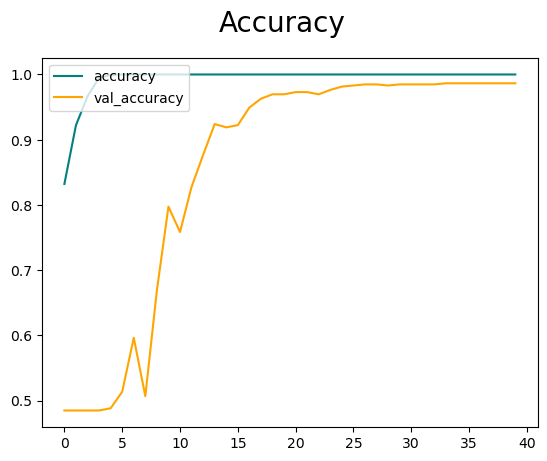

In [67]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

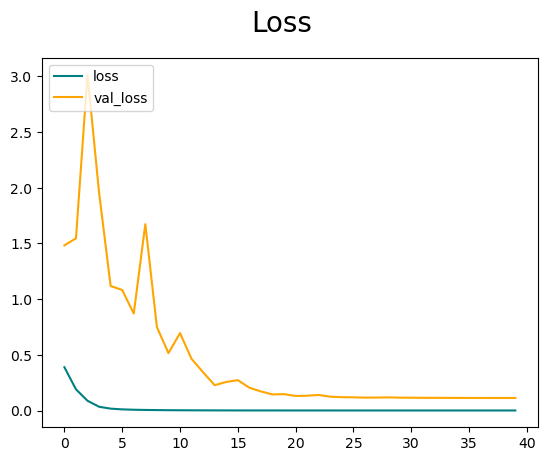

In [69]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# 4.KISIM

## 4.1 Modeli Test Etmek

In [77]:
# öncelik modelimizin performansına bakıyoruz

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.preprocessing import OneHotEncoder
import numpy as np

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

try:
    for batch in test.as_numpy_iterator():
        X, y = batch
        encoder = OneHotEncoder(sparse_output = False)
        y_one_hot = encoder.fit_transform(y.reshape(-1, 1))
        yhat = model.predict(X)
        pre.update_state(y_one_hot, yhat)
        re.update_state(y_one_hot, yhat)
        acc.update_state(y_one_hot, yhat)
except tf.errors.OutOfRangeError:
    print("Verilerin sonu")

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Precision:0.9776785969734192, Recall:0.9776785969734192, Accuracy:0.9776785969734192


Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


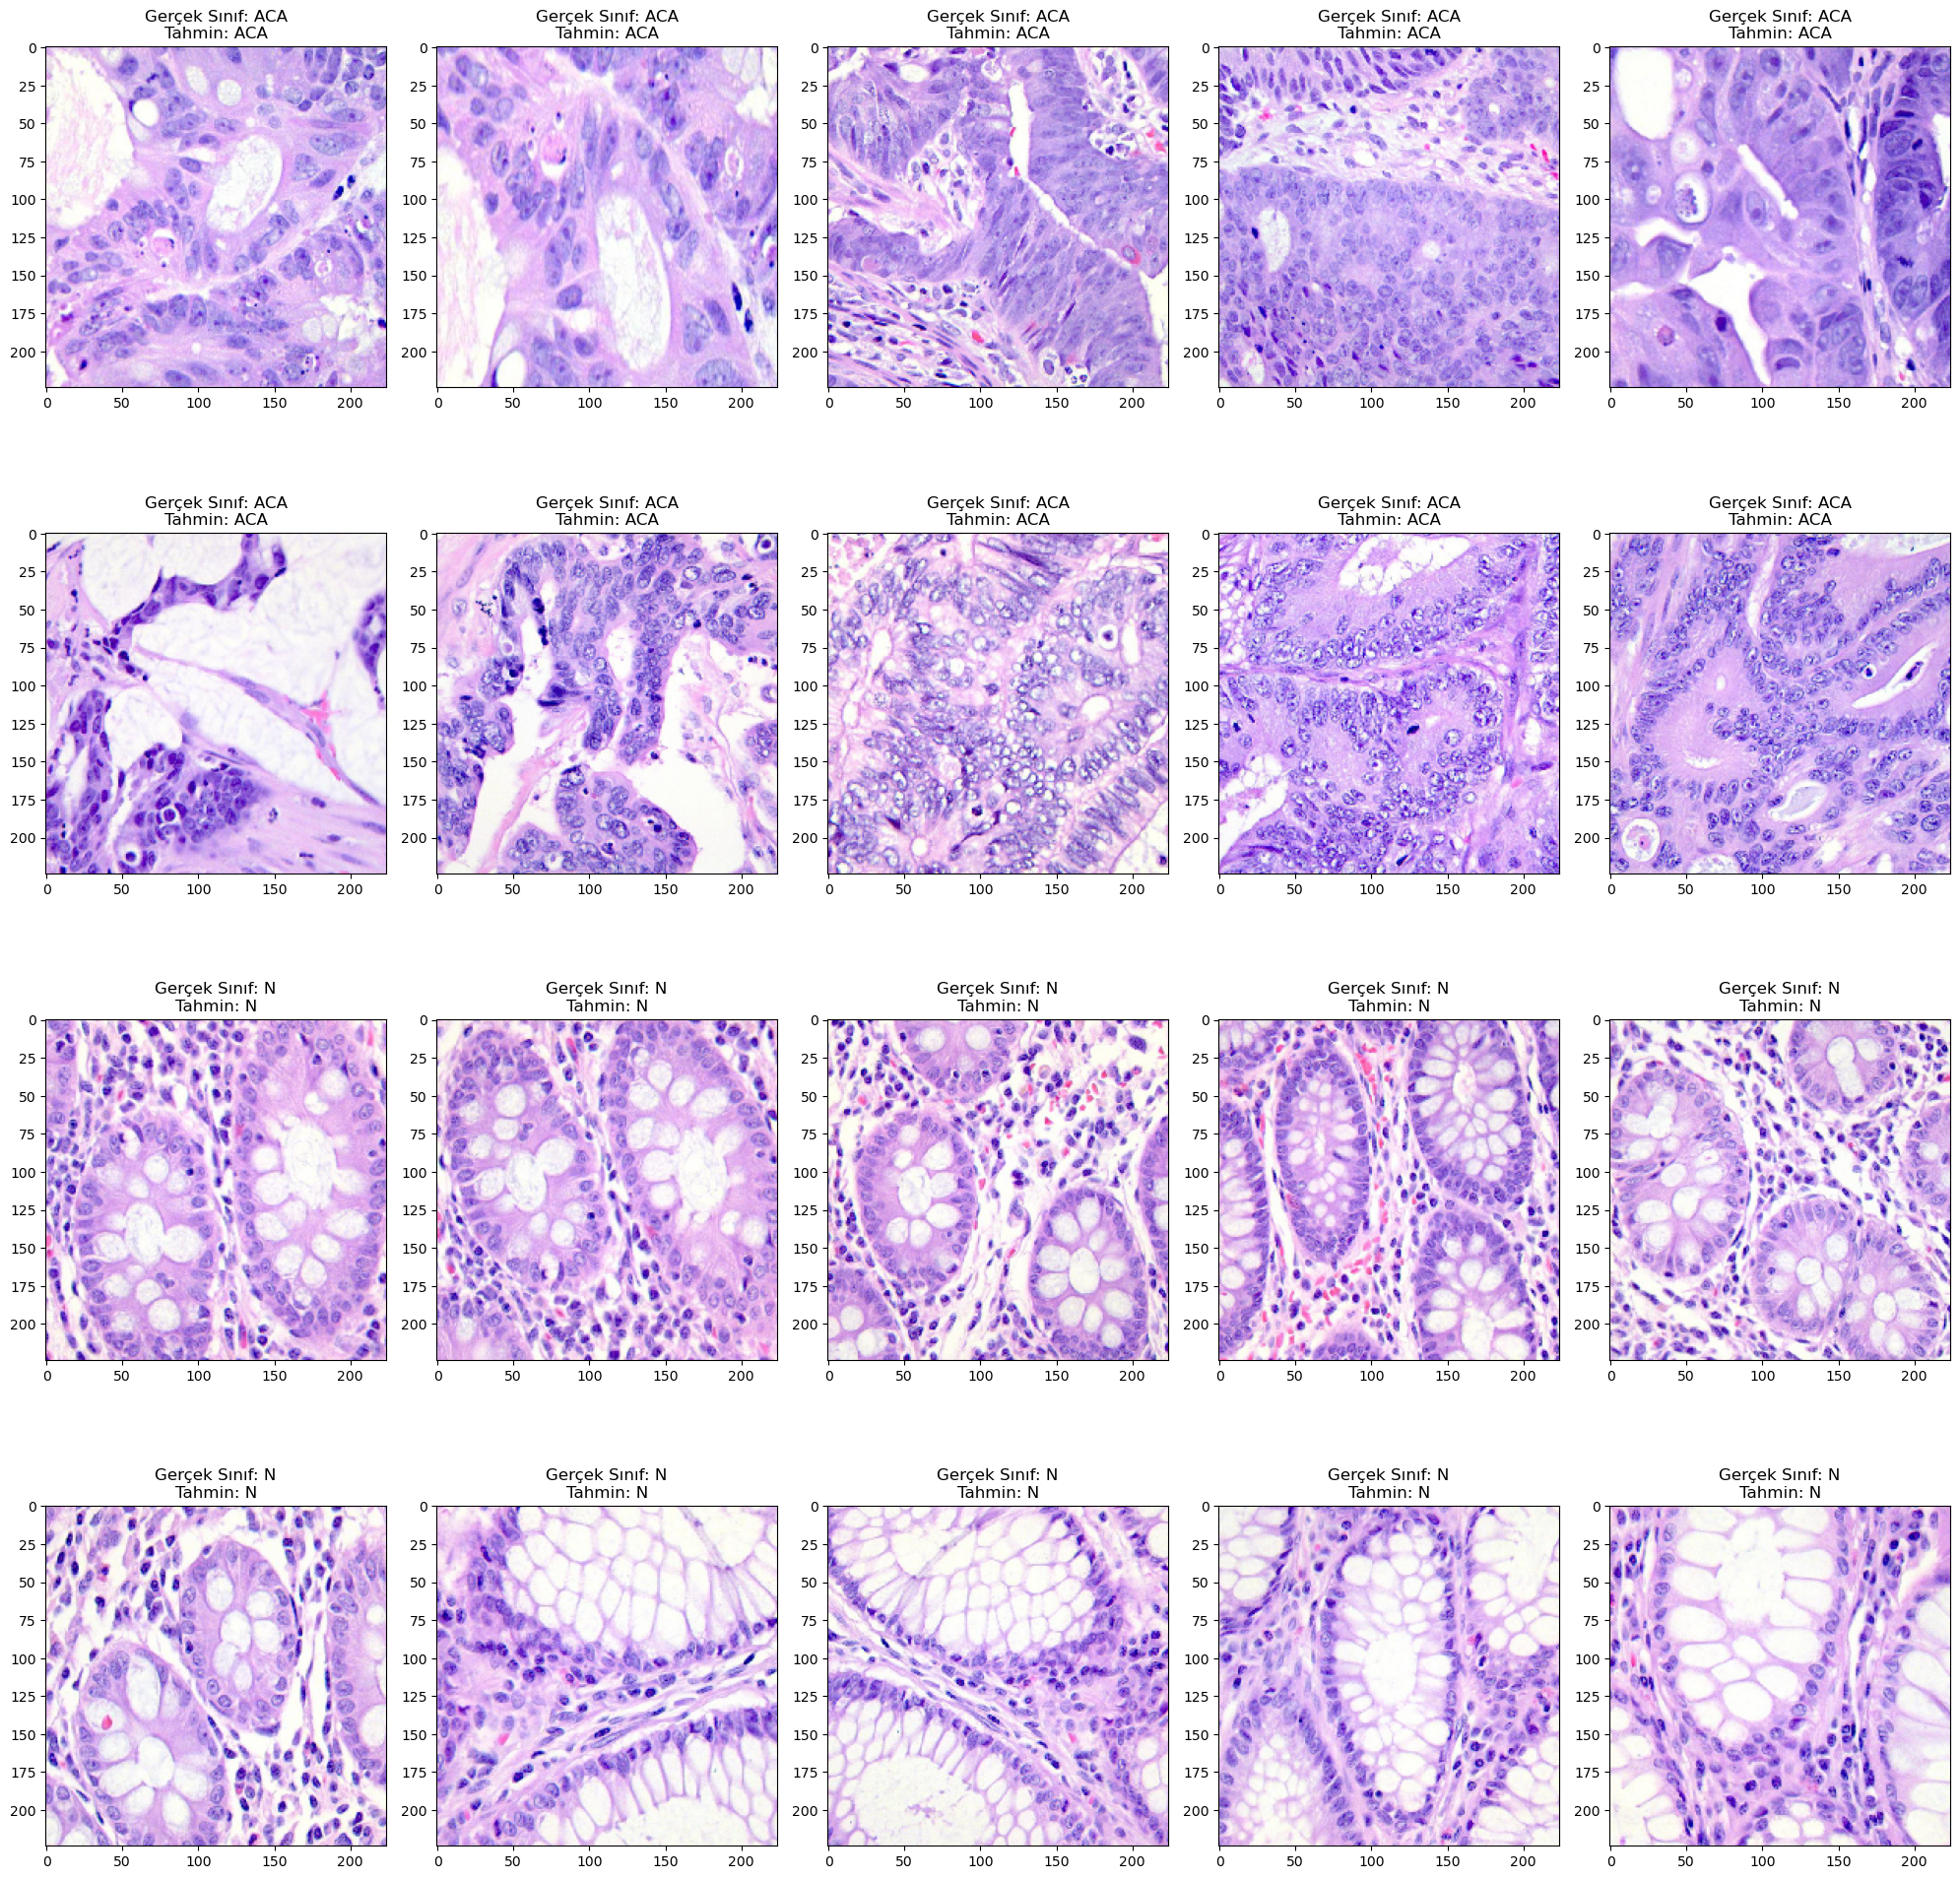

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

test_dir = 'forTest'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    classes=['colon_aca_test', 'colon_n_test']
)

predictions = model.predict(test_generator)

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

for idx, (img, label) in enumerate(zip(test_generator[0][0], test_generator[0][1])):
    row = idx // 5
    col = idx % 5
    ax[row, col].imshow(img)

    true_class = 'ACA' if label == 0 else 'N'
    
    predicted_class = 'ACA' if predictions[idx][1] <= 0.5 else 'N'
    
    ax[row, col].title.set_text(f"Gerçek Sınıf: {true_class}\nTahmin: {predicted_class}")

plt.tight_layout()
plt.show()

## 4.2 Modeli Kaydetmek

In [84]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'colon_model_v4.keras'))

## 4.3 Kaydedilmiş Modeli Yüklemek

In [93]:
from tensorflow.keras.models import load_model
# model v4 is the best
loaded_model = load_model(os.path.join('models', 'colon_model_v4.keras'), compile = False)
loaded_model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])